# Лекция 3. Описательная статистика

- Меры центральной тенденции: среднее арифметическое, среднее арифметическое взвешенное, среднее гармоническое, геометрическое, усеченное среднее, расчет средних на сгруппированных данных
- Структурные средние: медиана, мода, квартили. 
- Расчет средних характеристик с использованием R, визуализация данных (графики, диаграммы, ящик с усами).
- Меры изменчивости данных: дисперсия, среднее квадратическое отклонение, размах вариации, коэффициент осцилляции, относительное линейное отклонение, коэффициент вариации. Расчет показателей вариации с использованием R.

## Меры центральной тенденции: среднее арифметическое, среднее арифметическое взвешенное, среднее гармоническое, геометрическое, усеченное среднее, расчет средних на сгруппированных данных

Кроме манипулирования данными, при анализе приходится искать в данных некоторые тенденции и закономерности. На этом пути приходится искать в данных  усредненные характеристики, оценивать степень изменчивости данных, анализировать наличие выбросов в данных, высказывать гипотезы о типе распределения данных.

При этом важным обстоятельством является факт наличия у нас всех данных, или только части данных. В статистике для этих целей используются понятия **генеральная совокупность** и **выборка данных**.

Одни и те же данные можно рассматривать или как генеральную совокупность, или как выборку, в зависимости от целей их сбора и анализа. 

Например, данные о росте студентов какой-либо группы можно рассматривать как генеральную совокупность, т.е. все искомые данные, если целью анализа является формирование суждений об этом показателе именно для данной группы студентов. 

Но эти же данные можно рассматривать и как выборку данных, т.е. часть генеральной совокупности, если целью анализа является, например, оценка среднего роста студентов всего вуза по случайно выбранной группе студентов.

Таким образом,  анализ генеральной  совокупности подразумевает, что мы можем напрямую судить о характеристиках набора данных. В противоположность этому при анализе выборки мы работаем только с  частью генеральной совокупности, и любые утверждения о генеральной совокупности на основании выборки носят вероятностный характер. Например, при анализе выборки возникают дополнительные задачи оценки ошибок полученных оценочных параметров относительно фактических параметров в генеральной совокупности.
 
Продемонстрируем это на примере:



In [46]:
general_sequance<-rbinom(50,2000,0.9)
print(paste("Генеральная совокупность: ",toString(general_sequance)))
print(paste("Среднее на генеральной совокупности: ",toString(mean(general_sequance))))
choice_sequance<-sample(general_sequance,5)
print(paste("Выборочная совокупность: ",toString(choice_sequance)))
print(paste("Среднее на выборочной совокупности: ",toString(mean(choice_sequance))))

[1] "Генеральная совокупность:  1811, 1805, 1797, 1805, 1796, 1778, 1802, 1799, 1796, 1789, 1794, 1814, 1774, 1821, 1817, 1808, 1807, 1792, 1809, 1771, 1790, 1805, 1813, 1816, 1787, 1804, 1803, 1811, 1804, 1798, 1805, 1796, 1799, 1812, 1801, 1802, 1801, 1782, 1802, 1777, 1791, 1785, 1796, 1786, 1772, 1809, 1827, 1801, 1796, 1788"
[1] "Среднее на генеральной совокупности:  1798.88"
[1] "Выборочная совокупность:  1801, 1816, 1805, 1788, 1802"
[1] "Среднее на выборочной совокупности:  1802.4"


По практическим соображениям выборки анализируют чаще, чем генеральные совокупности, поскольку изучить все члены генеральной совокупности напрямую бывает невозможно или непозволительно дорого.

Меры центральной тенденции, также известные как меры положения, обычно одни из первых статистик, которые рассчитывают для числовых одномерных данных. Главная цель их расчета состоит в том,  чтобы дать представление о типичном или часто встречающемся значении. 

Три самые часто применяемые меры центральной тенденции - это **среднее**, **медиана** и **мода**.

Показатель в форме средней величины выражает типичные черты и дает обобщающую характеристику однотипных явлений по одному из имеющихся признаков. Важнейшее свойство средней величины заключается в том, что она отражает то общее, что присуще всем единицам исследуемой совокупности. Значения признака отдельных единиц совокупности колеблются в ту или иную сторону под влиянием множества факторов, среди которых могут быть как основные, так и случайные. Например, курс акций корпорации в основном определяется финансовыми результатами ее деятельности.

В то же время, в отдельные дни и на отдельных биржах эти акции в силу сложившихся обстоятельств могут продаваться по более высокому или заниженному курсу. Сущность средней в том и заключается, что в ней взаимопогашаются отклонения значений признака отдельных единиц совокупности, обусловленные действием случайных факторов, и учитываются изменения, вызванные действием факторов основных. Это позволяет средней отражать типичный уровень признака и абстрагироваться от индивидуальных особенностей, присущих отдельным единицам.

Типичность средней непосредственным образом связана с однородностью статистической совокупности. Средняя величина только тогда будет отражать типичный уровень признака, когда она рассчитана по качественно однородной совокупности. Так, если мы рассчитаем средний курс по акциям всех предприятий, реализуемых в данный день на данной бирже, то получим фиктивную среднюю. Это будет объясняться тем, что используемая для расчета совокупность является крайне неоднородной. В этом и подобных случаях метод средних используется в сочетании с методом группировок: если совокупность неоднородна – общие средние должны быть заменены или дополнены групповыми средними, т.е. средними, рассчитанными по качественно однородным группам.

Категорию средней можно раскрыть через понятие ее определяющего свойства. Если обозначить формулу нахождения средней величины для совокупности $(x_1,x_2,\ldots,x_n)$ через $\overline{x}=f(x_1,x_2,\ldots,x_n)$, то определяющее свойство средней вводится следующим соотношением:

$$\overline{x}=f(x_1,x_2,\ldots,x_n)=f(\overline{x},\overline{x},\ldots,\overline{x})$$

На роль функции $f(x_1,x_2,\ldots,x_n)$, удовлетворяющей  определяющему свойству средней, могут подходить разные функции:

*Средняя арифметическая*: $$\overline{x}_{\text{ариф}}=\frac{\sum_{i=1}^{n}x_i}{n}$$

Действительно, имеем:
    $$\frac{\sum_{i=1}^{n}x_i}{n}=\frac{\sum_{i=1}^{n}\overline{x}_{\text{ариф}}}{n}=\frac{n\cdot\overline{x}_{\text{ариф}}}{n}=\overline{x}_{\text{ариф}}$$
    
*Средняя гармоническая*:
$$\overline{x}_{гарм}=\frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}$$

Действительно, имеем:
$$\frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}}=\frac{n}{\sum_{i=1}^{n}\frac{1}{\overline{x}_{гарм}}}=\frac{n}{\frac{n}{\overline{x}_{гарм}}}=\overline{x}_{гарм}$$

Средняя арифметическая, геометрическая, гармоническая являются различными формами средней величины. В разных случаях  могут использоваться разные формы.


<font size="2"> Например, попробуйте решить следующую задачку: первую половину пути самолет летел со скоростью 700 км/ч, а вторую половину пути со скоростью 1000 км/ч. Какова средняя скорость самолета на всем участке пути?</font> 

Средняя скорость определяется как отношение суммарного пройденного пути к затраченному времени.
$$S_1=v_1\cdot t_1, S_2=v_2\cdot t_2\Rightarrow v_{\text{ср}}=\frac{S_1+S_2}{t_1+t_2}=\frac{v_1\cdot t_1+v_2\cdot t_2}{t_1+t_2}$$
$$S_1=S_2=\frac{S_1+S_2}{2}, t_1=\frac{\frac{S_1+S_2}{2}}{v_1}, t_2=\frac{\frac{S_1+S_2}{2}}{v_2}$$
$$v_{\text{ср}}=\frac{S_1+S_2}{t_1+t_2}=\frac{1}{\frac{\frac{1}{2}}{v_1}+\frac{\frac{1}{2}}{v_2}}=\frac{2}{\frac{1}{v_1}+\frac{1}{v_2}}$$


In [19]:
print((700+1000)/2)
print(2/(1/700+1/1000))

[1] 850
[1] 823.5294


Однако, с точки зрения оценки центральной тенденции для генеральной совокупности в теории вероятностей доказывается, что среднее арифметическое на основе выборки обладает хорошими свойствами: состоятельность, несмещенность, эффективность.

Рассмотрим ряд примеров. Пусть у нас имеется список значений, отражающий размер обуви некоторой группы людей (например, студентов группы):

In [47]:
foot_size=c(34,35,38,36,34,35,39,40,41,45,37,39,41,43,44,46,43,42,42,41,40,39)


Посчитаем в этом векторе количество повторяющихся значений. Для этих целей в R есть ряд возможностей: функция table() и специальная функция hist():

In [26]:
help(hist)

hist {graphics},R Documentation
x,a vector of values for which the histogram is desired.
breaks,"one of: a vector giving the breakpoints between histogram cells, a function to compute the vector of breakpoints, a single number giving the number of cells for the histogram, a character string naming an algorithm to compute the number of cells (see ‘Details’), a function to compute the number of cells. In the last three cases the number is a suggestion only; as the breakpoints will be set to pretty values, the number is limited to 1e6 (with a warning if it was larger). If breaks is a function, the x vector is supplied to it as the only argument (and the number of breaks is only limited by the amount of available memory)."
freq,"logical; if TRUE, the histogram graphic is a representation of frequencies, the counts component of the result; if FALSE, probability densities, component density, are plotted (so that the histogram has a total area of one). Defaults to TRUE if and only if breaks are equidistant (and probability is not specified)."
probability,"an alias for !freq, for S compatibility."
include.lowest,"logical; if TRUE, an x[i] equal to the breaks value will be included in the first (or last, for right = FALSE) bar. This will be ignored (with a warning) unless breaks is a vector."
right,"logical; if TRUE, the histogram cells are right-closed (left open) intervals."
density,"the density of shading lines, in lines per inch. The default value of NULL means that no shading lines are drawn. Non-positive values of density also inhibit the drawing of shading lines."
angle,"the slope of shading lines, given as an angle in degrees (counter-clockwise)."
col,a colour to be used to fill the bars. The default of NULL yields unfilled bars.
border,the color of the border around the bars. The default is to use the standard foreground color.


In [48]:
tt<-table(foot_size)
tt

foot_size
34 35 36 37 38 39 40 41 42 43 44 45 46 
 2  2  1  1  1  3  2  3  2  2  1  1  1 

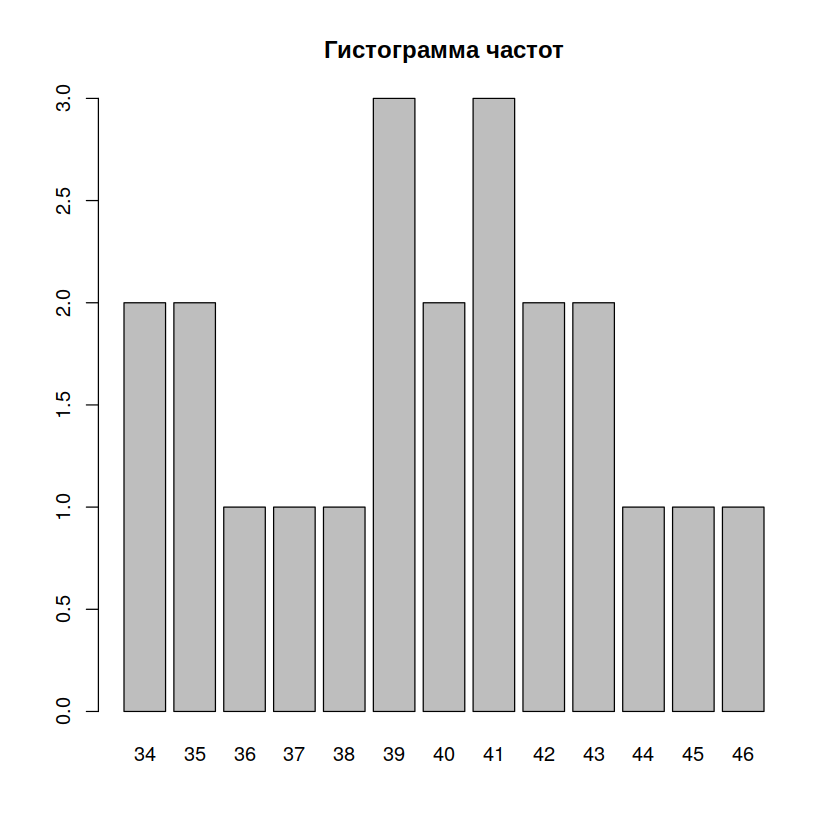

In [49]:
barplot(tt, main="Гистограмма частот")

Функция hist предоставляет более расширенный функционал:

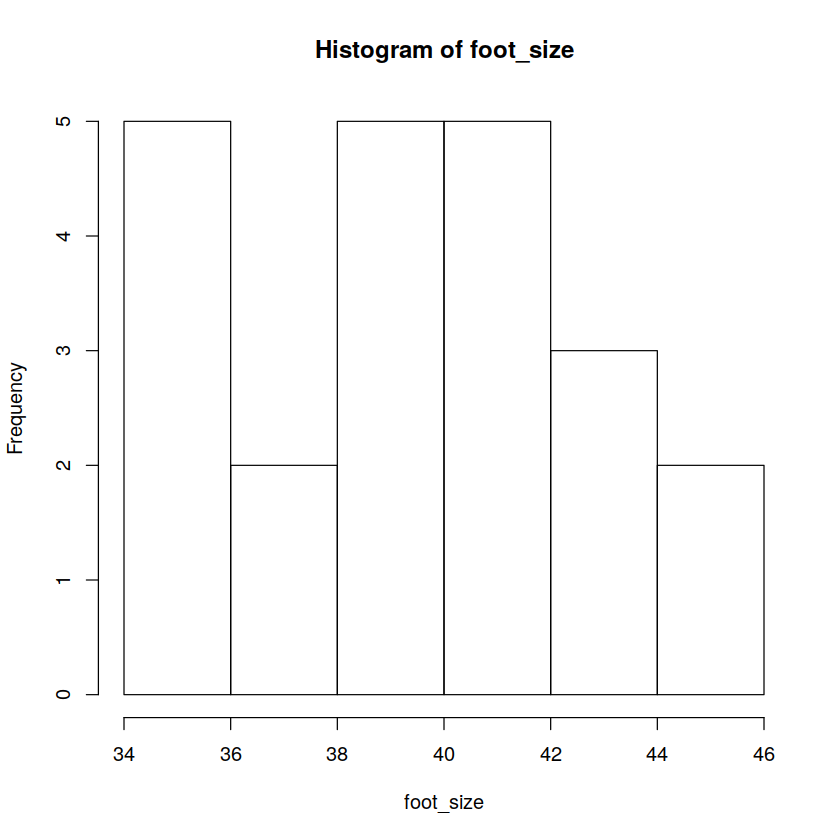

In [51]:
h<-hist(foot_size, freq=TRUE)

In [15]:
print(h)

$breaks
[1] 34 36 38 40 42 44 46

$counts
[1] 5 2 5 5 3 2

$density
[1] 0.11363636 0.04545455 0.11363636 0.11363636 0.06818182 0.04545455

$mids
[1] 35 37 39 41 43 45

$xname
[1] "foot_size"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


Реализуем функцию расчета среднего арифметического в R:

In [52]:
my_mean<-function(v){
    return(sum(v)/length(v))
    }
print(my_mean(foot_size))
print(mean(foot_size))

[1] 39.72727
[1] 39.72727


Среднее арифметическое можно посчитать и по другому, используя структуру таблицы:

In [53]:
print(tt)

foot_size
34 35 36 37 38 39 40 41 42 43 44 45 46 
 2  2  1  1  1  3  2  3  2  2  1  1  1 


In [55]:
names(tt)

[1] "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45" "46"

In [56]:
value<-as.numeric(names(tt))
value

[1] 34 35 36 37 38 39 40 41 42 43 44 45 46

In [58]:
freq<-as.vector(tt)
freq

[1] 2 2 1 1 1 3 2 3 2 2 1 1 1

In [20]:
sum(value*freq)/sum(freq)

[1] 39.72727

Можно также оценить среднее арифметическое через середины интервалов, полученные при построении гистограммы:

In [21]:
sum(h$mids*h$counts)/sum(h$counts)

[1] 39.45455

Полученное таким образом значение называется **средним арифметическим взвешенным**.
Аналогичным образом можно говорить о средних **гармонических взвешенных**, **средних геометрических взвешенных**.
Если частоту значения $x_i$ обозначить через $f_i$, то формулы расчета средних взвешенных будут иметь следующий вид:
$$\overline{x}_{\text{ариф}}=\frac{\sum_{i=1}^{n}f_i\cdot x_i}{\sum_{i=1}^{n}f_i}$$
$$\overline{x}_{\text{геом}}=\left(\prod_{i=1}^{n}x_i^{f_i}\right)^{\frac{1}{\sum_{i=1}^{n}f_i}}$$
$$\overline{x}_{\text{гарм}}=\frac{\sum_{i=1}^{n}f_i}{\sum_{i=1}^{n}\frac{f_i}{x_i}}$$

Ниже приводятся реализации этих функций, предполагается, что на вход подается таблица частот, которая получается из списка значений с помощью функции table.

In [1]:
mean_f<-function(tab){
    value<-as.numeric(names(tab))
    freq<-as.vector(tab)
    return(sum(value*freq)/sum(freq))
    }
geom_f<-function(tab){
    value<-as.numeric(names(tab))
    freq<-as.vector(tab)
    return(prod(value^freq)^(1/sum(freq)))
    }
garm_f<-function(tab){
    value<-as.numeric(names(tab))
    freq<-as.vector(tab)
    return(sum(freq)/(sum(freq/value)))
    }

In [60]:
print(mean_f(tt))
print(geom_f(tt))
print(garm_f(tt))

[1] 39.72727
[1] 39.57767
[1] 39.42652


По набору значений также можно построить аппроксимацию графика плотности распределения, это выполняется с помощью функции density.

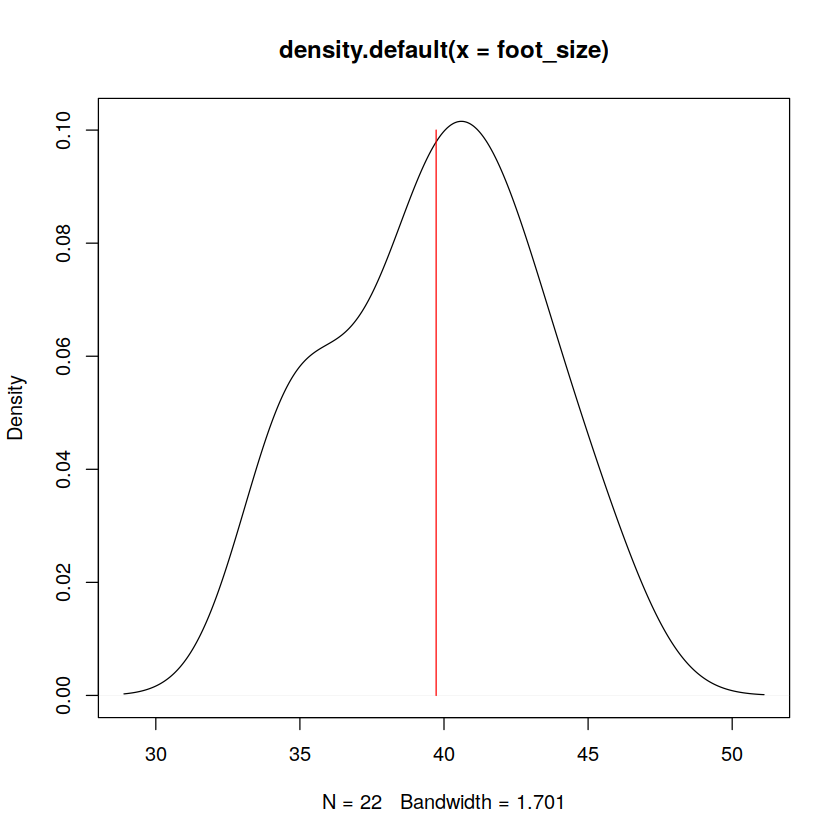

In [61]:
#Нарисуем на графике плотности распределения значение средней арифметической 

d <- density(foot_size)
plot(d)
x<-c(mean_f(tt),mean_f(tt))
y<-c(0.00,0.1)
lines(x,y,col="red")


Среднее - это интуитивно понятная мера центральной тенденции, которую легко осознать большинству людей. Однако среднее в этом качестве следует использовать не для любых данных, поскольку оно чувствительно к экстремальным значениям, или выбросам, и также может вести к неверным выводам в случае асимметричного распределения данных. Например, средняя темперратура по больнице практически ничего не характеризует. В данных с очень ассиметричным распределением ценность среднего арифметического, как оценки типичного представителя, аналогичным образом быстро деградирует. Например, добавим в наш массив данных всего одного человека с 1000 размером обуви (явный выброс).

 [1]   34   35   38   36   34   35   39   40   41   45   37   39   41   43   44
[16]   46   43   42   42   41   40   39 1000
[1] 81.47826


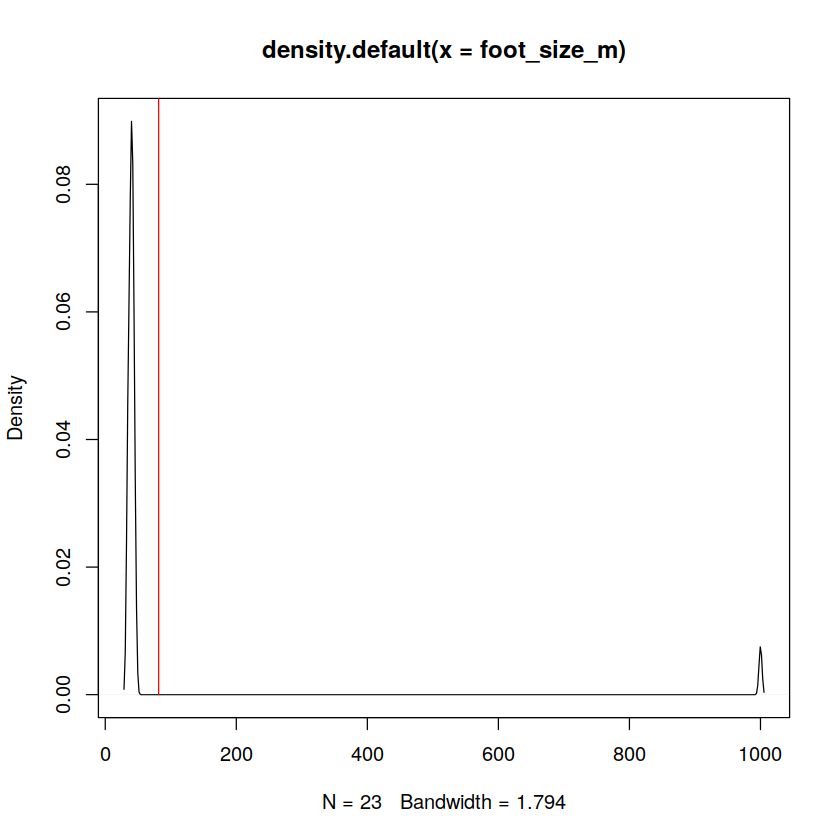

In [63]:
foot_size_m<-c(foot_size,1000)
tt_m<-table(foot_size_m)
print(foot_size_m)
print(mean_f(tt_m))
d <- density(foot_size_m)
plot(d)
x<-c(mean_f(tt_m),mean_f(tt_m))
y<-c(0.00,0.1)
lines(x,y,col="red")


Как видно, средний размер обуви оказался равным 81, что одинаково далеко от любых типичных представителей этой совокупности. Посмотрим, как поменяются другие формы среднего.

In [64]:
print(geom_f(tt_m))
print(garm_f(tt_m))

[1] 45.54395
[1] 41.14489


Как видно, в целом они оказались более устойчивы. Вообще всегда выполняется система неравенств:
$$\overline{x}_{\text{aриф}}\geq\overline{x}_{\text{геом}}\geq\overline{x}_{\text{гарм}}$$

На практике для улучшения устойчивости средних к выбросам используют **усечённое среднее**, суть которого состоит в вычислении среднего без определенного количества в хвостах отсортированных данных: 5%, 10% и т.д. Для усечения нужно использовать параметр trim в функции mean. Например, вот так мы срежем 10% данных с хвостов распределения:

In [66]:
mean(foot_size_m,trim=0.1)
sum(foot_size_m-mean(foot_size_m))

[1] 40

[1] -5.684342e-14

Если рассматривать некоторые не самые тривиальные свойства среднего арифметического, то можно показать, что:

 $$\forall n, x_i: \sum_{i=1}^{n}(x_i-\overline{x})=0$$

Действительно, имеем:

$$ \sum_{i=1}^{n}(x_i-\overline{x})=\sum_{i=1}^{n}x_i-\sum_{i=1}^{n}\overline{x}=\sum_{i=1}^{n}x_i-\overline{x}\cdot\sum_{i=1}^{n}1=\sum_{i=1}^{n}x_i-\overline{x}\cdot n=\sum_{i=1}^{n}x_i-\frac{\sum_{i=1}^{n}x_i}{n}\cdot n=\sum_{i=1}^{n}x_i-\sum_{i=1}^{n}x_i=0$$

Таким образом, сумма отклонений среднего арифметического от каждого индивидуального значения равна нулю.

Также оказывается справедливым следующее:

$$\forall n, x_i: \sum_{i=1}^{n}\left (x_i-\overline{x}\right)^2\rightarrow \min$$

Действительно, найдем такое число $c$, при котором $f(c)=\sum_{i=1}^{n}\left (x_i-с\right)^2\rightarrow \min$

Для этого найдем производную:
$$\frac{\partial f(с)}{\partial с}=-2\sum_{i=1}^{n}\left (x_i-с\right)$$
Чтобы найти минимум функции $f(c)$, приравняем производную к нулю:
$$-2\sum_{i=1}^{n}\left (x_i-с\right)=0\Rightarrow \sum_{i=1}^{n}\left (x_i-с\right)=0$$
А из предыдущего мы как раз показали, что при $c=\overline{x}$ имеем: $\sum_{i=1}^{n}\left (x_i-\overline{x}\right)=0$

Таким образом, среднее арифметическое удовлетворяет некоторому критерию оптимальности - оно обеспечивает минимальную сумму квадратов отклонений каждого конкретного значения от значения, взятого в качестве типичного представителя. 

In [67]:
j<-mean(foot_size)
print(j)
sum((foot_size-j)^2)

[1] 39.72727


[1] 258.3636

In [68]:
j<-40
print(j)
sum((foot_size-j)^2)

[1] 40


[1] 260

In [69]:
j<-39
print(j)
sum((foot_size-j)^2)

[1] 39


[1] 270

## Структурные средние: медиана, мода, квартили

Критерии оптимальности могут быть и другими, например:
$$\sum_{i=1}^{n}\left |x_i-c\right|\rightarrow \min$$
сумма модулей отклонения каждого индивидуального значения от типичного представителя минимально. Последнему критерию удовлетворяет так называемое *структурное среднее* - **медиана**.

In [98]:
print(sort(foot_size_m))
print(length(foot_size_m))

 [1]   34   34   35   35   36   37   38   39   39   39   40   40   41   41   41
[16]   42   42   43   43   44   45   46 1000
[1] 23


Медиана является более устойчивой к выбросам.

Медиана в данных - это срединное значение, если данные отсортировать по возрастанию или убыванию.

Саму совокупность значений исходных данных, расположенных в порядке возрастания (неубывания) называют вариационным рядом.

Если есть  𝑛  значений, то медиана формально определяется как значение с порядковым номером (п + 1)/2. Например, если  𝑛=7  то срединное значение - это значение с номером (7 + 1)/2=4. Действительно,
[1,2,3,4,5,6,7]
 
видно, что четверка посередине.

Если  𝑛  четное число, то медиана определяется как среднее арифметическое двух срединных значений:
[1,2,3,4, 5,6,7,8]
 
4+52=4.5
 
Рассчитаем медианное значение для нашего примера:

In [70]:
my_median<-function(L){
    n<-length(L)
    sort_L<-sort(L)
    index<-(n)%/%2
    if (n%%2==1) return(sort_L[index])
    else return((sort_L[index-1]+sort_L[index])/2)
}


In [71]:
my_median(foot_size_m)

[1] 40

In [72]:
#Можно использовать и встроенную функцию:
median(foot_size_m)

[1] 40

Обобщением медианы является **квантиль** - значение, меньше которого расположен определенный процент данных. Причем медиана является частным случаем квантиля на 0.5. Квантиль, переведенный в проценты, часто называют **процентиль** или **перцентиль**.

In [73]:
my_quantile<-function(L,p){
    index=floor(p*length(L))
    return(sort(L)[index])
    }
                   

In [74]:
#Получаем некоторые квантили:
print(my_quantile(foot_size_m,0)) # это минимальное значение в данных
print(my_quantile(foot_size_m,0.25))
print(my_quantile(foot_size_m,0.5))
print(my_quantile(foot_size_m,0.75))
print(my_quantile(foot_size_m,0.9999)) # это максмальное значение в данных

numeric(0)
[1] 36
[1] 40
[1] 42
[1] 46


Конечно же есть встроенная функция получения квантилей.

In [75]:
#Получаем некоторые квантили:
print(quantile(foot_size_m,0)) # это минимальное значение в данных
print(quantile(foot_size_m,0.25))
print(quantile(foot_size_m,0.5))
print(quantile(foot_size_m,0.75))
print(quantile(foot_size_m,0.9999)) # это максмальное значение в данных

0% 
34 
 25% 
37.5 
50% 
 40 
 75% 
42.5 
  99.99% 
997.9012 


Еще используется термин **квартиль**, который означает, что весь набор отсортированных данных разбивают на 4 равные части. 

Тогда **первый квартиль** $Q_1$ - это $\frac{n+1}{4}$ ранжированное значение в данных (т.е. это значение, левее которого находится 25% всех значений). Очевидно, что первый квартиль совпадает с 0.25 квантилем.

**Третий квартиль** $Q_3$ - это $\frac{3(n+1)}{4}$ ранжированное значение в данных (т.е. это значение, правее которого находтся четверть (25%) всех значений). Очевидно, что третий квартиль совпадает с 0.75 квантилем.

**Второй квартиль** $Q_2$- это значение, правее и левее которого находится половина исходных данных. Ясно, что второй квартиль совпадает с медианным значением.

<p align="center"><img src="ris1.jpg" width="500" height="500"></p>

Реже для характеристики типичного представителя используют модальное значение(моду), которая определяется как наиболее часто встречающееся данное. Однако в исходных данных может оказаться несколько таких значений.

In [120]:
tt_m

foot_size_m
  34   35   36   37   38   39   40   41   42   43   44   45   46 1000 
   2    2    1    1    1    3    2    3    2    2    1    1    1    1 

Например, в исходных данных видно, что имеется два значения, которые встрречаются с максимальной частотой: 39, 41.
В этом случае принято говорить про мультимодальное распределение.

## Расчет средних характеристик с использованием R, визуализация данных (графики, диаграммы, ящик с усами).

Итак, при проведении предварительного анализа данных очень часто прибегают к различным визуализациям данных. 

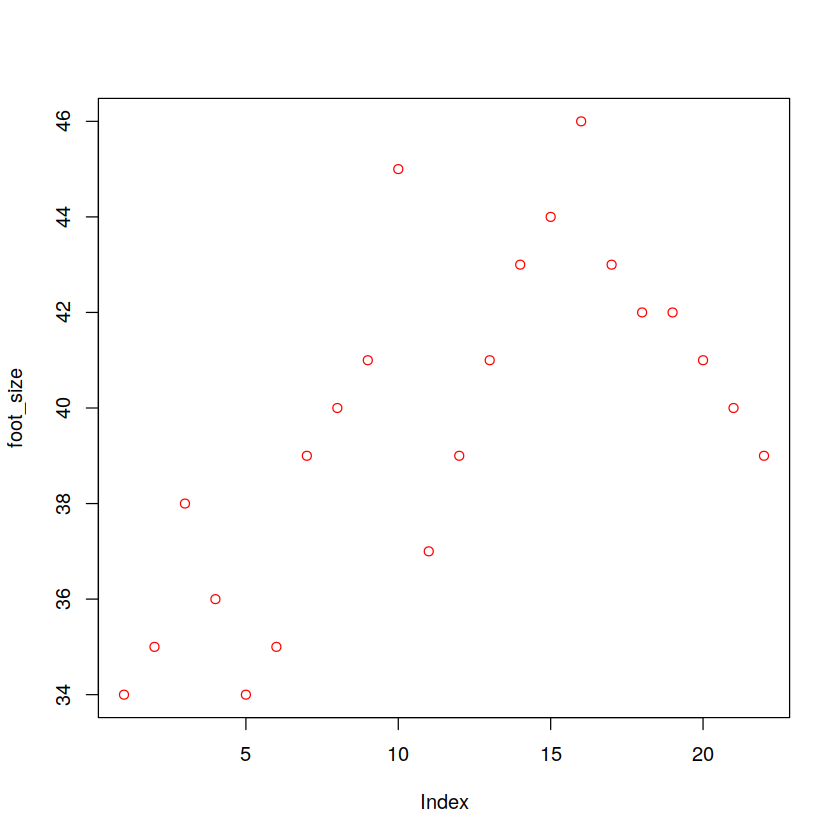

In [76]:
#Простой график 
plot(foot_size,col="red")

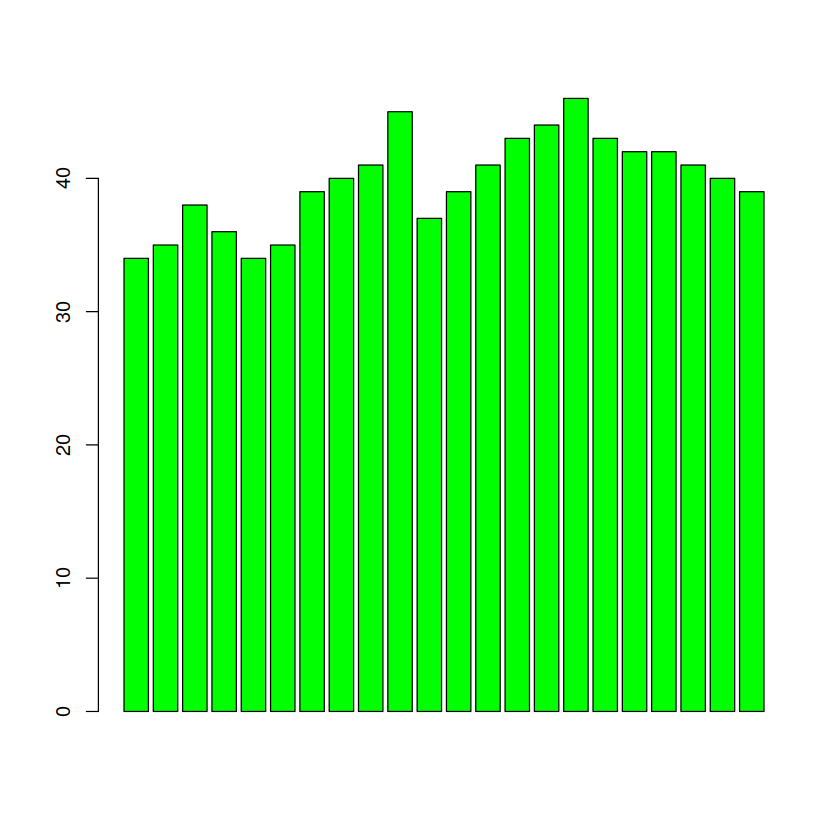

In [124]:
#Столбчатая диаграмма
barplot(foot_size,col="green")

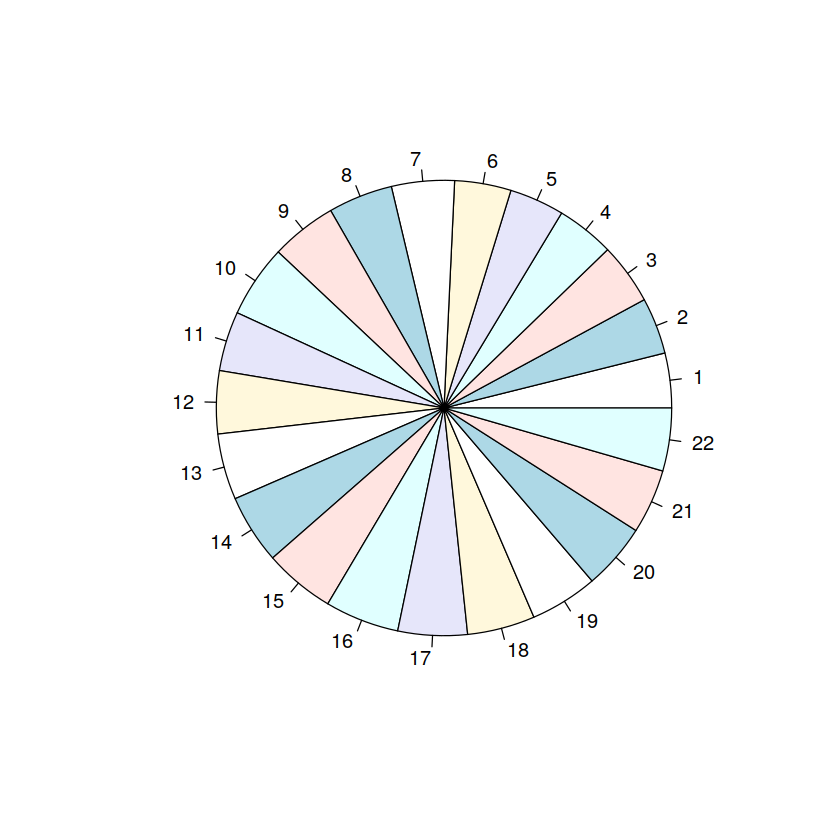

In [125]:
#Круговая диаграмма
pie(foot_size)

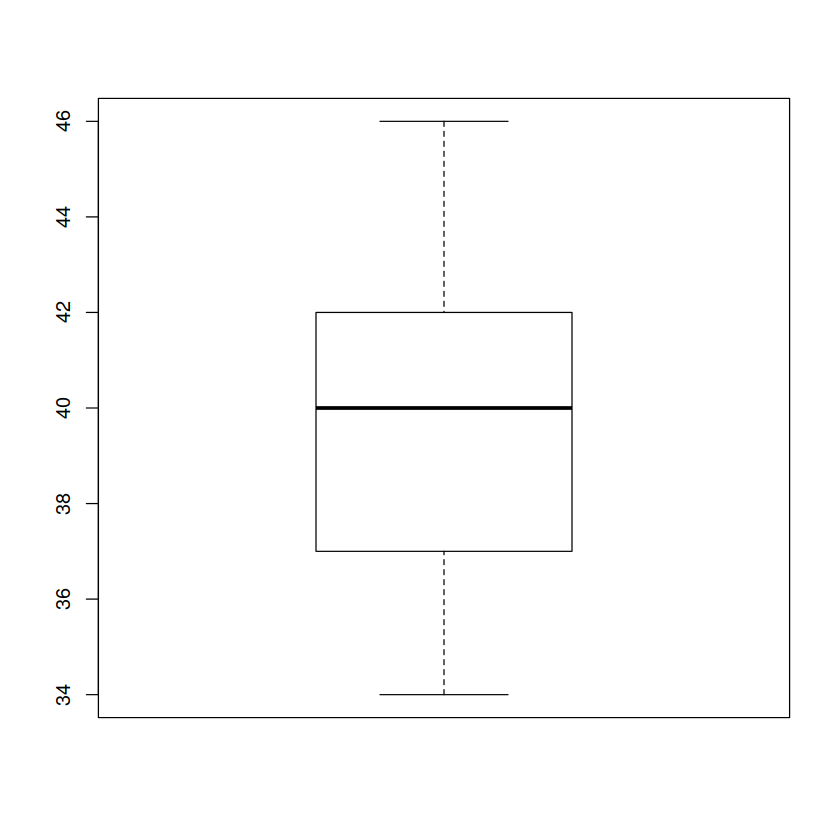

In [80]:
#Диаграмма размаха - ящик с усами
boxplot(foot_size)

Пояснения для диаграммы "Ящик с усами":

<img src="ris2.jpg">

In [9]:
length(foot_size[(foot_size>median(foot_size)) & (foot_size<quantile(foot_size,0.75))])


[1] 3

In [10]:
length(foot_size[(foot_size<median(foot_size)) & (foot_size>quantile(foot_size,0.25))])

[1] 4

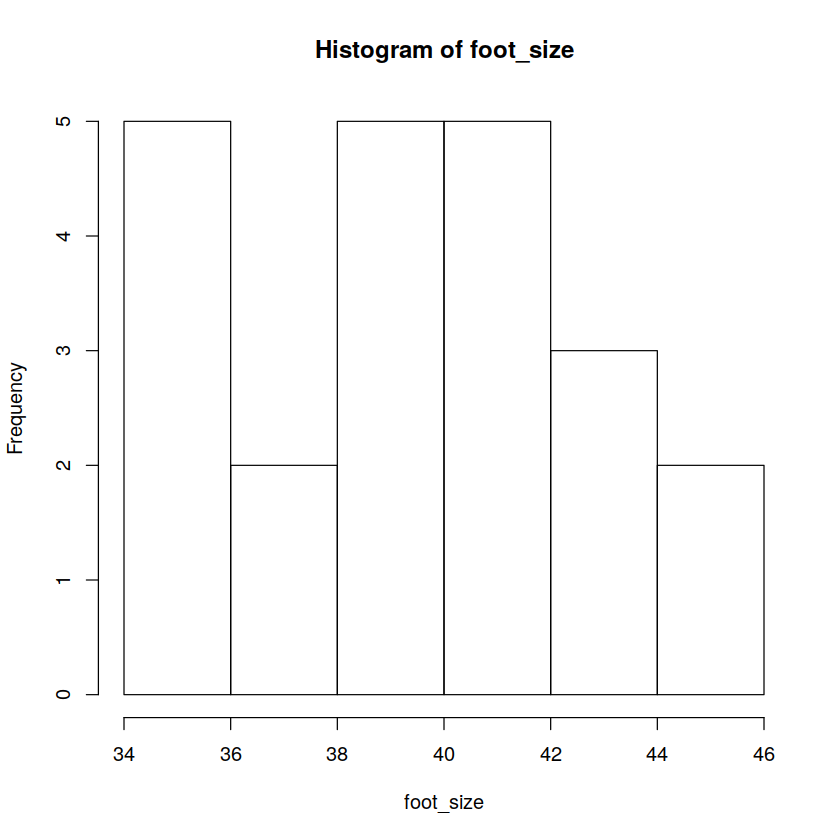

In [138]:
#Гистограмма
hist(foot_size)

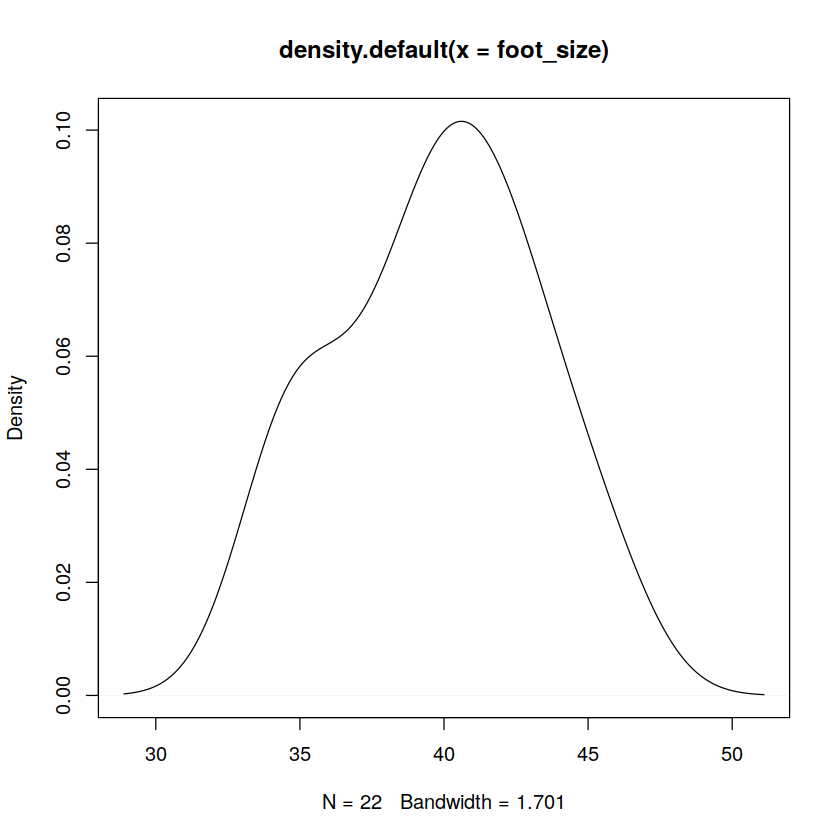

In [139]:
#Аппроксимация графика плотности распределения
plot(density(foot_size))

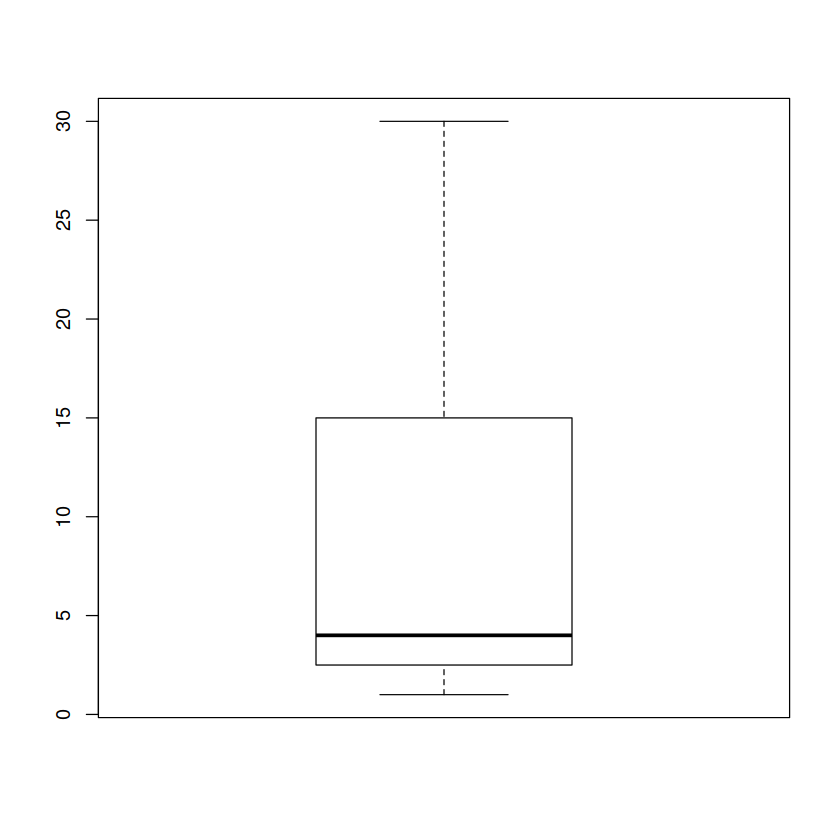

In [81]:
gg<-c(1,2,3,4,10,20,30)
boxplot(gg)

## Меры изменчивости данных: дисперсия, среднее квадратическое отклонение, размах вариации, коэффициент осцилляции, относительное линейное отклонение, коэффициент вариации. Расчет показателей вариации с использованием R

Оценки средней тенденции явно недостаточно для полной характеристики массива данных. Часто важно понимать, насколько сильно данные отклоняются от этой средней тенденции.

Например, если рассмотреть две последовательности:

In [2]:
S1=c(1,2,3,4,5,6,7,8,9)
S2=c(5,5,5,5,5,5,5,5,5)
View(data.frame(median(S1),mean_f(table(S1)), geom_f(table(S1)), garm_f(table(S1))))
View(data.frame(median(S2),mean_f(table(S2)), geom_f(table(S2)), garm_f(table(S2))))



median.S1.,mean_f.table.S1..,geom_f.table.S1..,garm_f.table.S1..
<dbl>,<dbl>,<dbl>,<dbl>
5,5,4.147166,3.181372


median.S2.,mean_f.table.S2..,geom_f.table.S2..,garm_f.table.S2..
<dbl>,<dbl>,<dbl>,<dbl>
5,5,5,5


Видно, что среднее арифметическое, медиана этих последовательностей совпадают, однако сами последовательности существенно различны: одна последовательность равномерно возрастающая, вторая абсолютно неизменная.

Поэтому для более детального изучения того или иного явления необходимо учитывать разброс или вариацию значений отдельных единиц совокупности. 

На практике часто с помощью показателей вариации оценивают стабильность, устойчивость некоторых процессов: точность изготовления изделия по отклонениям параметров изделий от их номинальных размеров, устойчивость производительности труда на производстве. 

Также показатели вариации используют для оценки возникающих рисков, например, в сфере анализа рынка ценных бумаг, где мера колеблемости отождествляется с мерой рискованности вложения денежных средств.

Рассмотрим основные показатели, характеризующие вариацию.

**Размах вариации** равен разности между максимальным и минимальным значениями признака:
$$R=x_{max}-x_{min}$$

Исходя из своего определения, этот показатель служит  мерой разброса экстремальных значений признака. Также  размах вариации может быть использован для выявления ошибок. При наличии очень больших (или очень малых) ошибочно записанных значений признака размах вариации сразу резко возрастает, что требует проверки и корректировки исходных данных.

Недостатком данного показателя является то, что он оценивает только границы варьирующего признака и не отражает его колеблемость внутри этих границ. 

Похожей мерой вариации является **интерквартильный размах**, который отражает среднюю половину данных (50% данных между третьим и первым квартилями):
$$IQR=Q_3-Q_1$$


Более точной характеристикой вариации является **среднее линейное отклонение** от среднего арифметического:

$$d=\frac{\sum_{i=1}^{n}{\vert x_i-\overline{x}_{\text{ариф}}\vert}}{n}$$

Если исходные данные сгруппированы, то можно находить взвешенное среднее линейное отклонение (в качестве веса применяют частоту):
$$d=\frac{\sum_{i=1}^{n}{\vert x_i-\overline{x}_{\text{ариф}}\vert\cdot f_i}}{\sum_{i=1}^{n}f_i
}$$

Но чаще всего в качестве меры вариации используют **дисперсию**:
$$D=\frac{\sum_{i=1}^{n}{\left ( x_i-\overline{x}_{\text{ариф}}\right )^2}}{n}$$

Дисперсия имеет единицы измерения квадрат измеряемой величины, что не всегда удобно для сравнительных оценок. Поэтому на практике чаще используют **среднее квадратическое отклонение** (часто употребляют термин **стандартное отклонение**):
$$\sigma=\sqrt{D}=\sqrt{\frac{\sum_{i=1}^{n}{\left ( x_i-\overline{x}_{\text{ариф}}\right )^2}}{n}}$$

Среднее квадратическое отклонение уже имеет размерность величины, у которой мы измеряем вариацию.
Использование дисперсии связано с наличием у нее массы замечательных свойств. Прежде чем мы их рассмотрим, вспомним немного теорию вероятностей.

В теории вероятностей для некоторой случайной величины $X$ с заданным законом распределения вероятностей вводят понятие **математического ожидания**, $M(X)$ как положения центра распределения вероятностей.

Для *дискретной случайной величины* $X$ математическое ожидание выражается:
$$M(X)=\sum_{i=1}^{n}x_i\cdot p_i$$
где $p_i$ - вероятность значения $x_i$.

Если в качестве оценки вероятности $p_i$ принять: $$p_i=\frac{f_i}{\sum_{i=1}^{n}f_i}$$
то формула фактически совпадает со средним арифметически взвешенным. Поэтому среднее арифметически взвешенное является адекватной оценкой математического ожидания дискретной случайной величины.  

Математическое ожидание имеет следующие свойства:

- Математическое ожидание постоянной величины равно ее числовому значению:
$$M(C)=C\cdot 1=C$$
Постоянная $C$ имеет единственное значение, вероятность которого равна 1.
- Постоянный множитель можно выносить за знак математического ожидания:
$$M(CX)=\sum_{i=1}^{n}Cx_i\cdot p_i=C\sum_{i=1}^{n}x_i\cdot p_i=CM(X)$$
- Математическое ожидание суммы двух случайных величин равно сумме их математических ожиданий:
$$M(X+Y)=M(X)+M(Y)$$
Действительно, имеем:
$$M(X+Y)=\sum_{i=1}^{n}p_i(x_i+y_i)=\sum_{i=1}^{n}p_i\cdot x_i+\sum_{i=1}^{n}p_i\cdot y_i=M(X)+M(Y)$$

Введем понятие независимых случайных величин - две случайные величины называются независимыми, если закон распределения каждой из них не зависит от того, какие значения приняла другая случайная величина.

Математическое ожидание произведения двух взаимно независимых случайных величин равняется произведению их математических ожиданий: 
$$M(XY)=M(X)M(Y)$$
Обоснуем данное утверждение непосредственной проверкой:


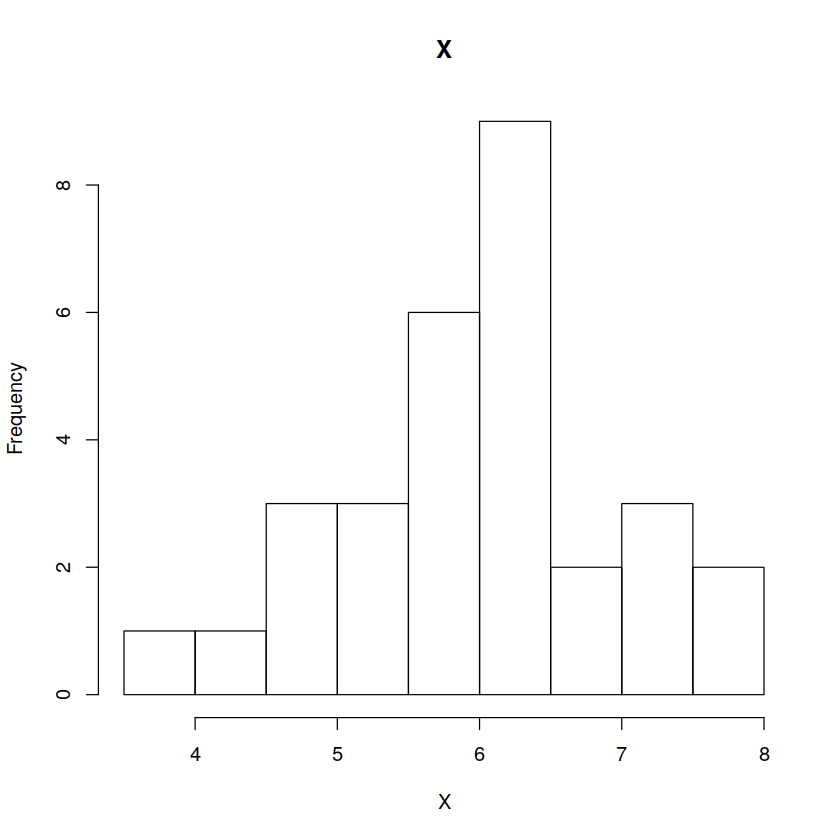

Сред. X,Сред. X,Сред. X*Y,Сред. X * Сред.Y,Сред.X+Y,Сред. X + Сред.Y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.948516,4.931853,29.17044,29.33721,10.88037,10.88037


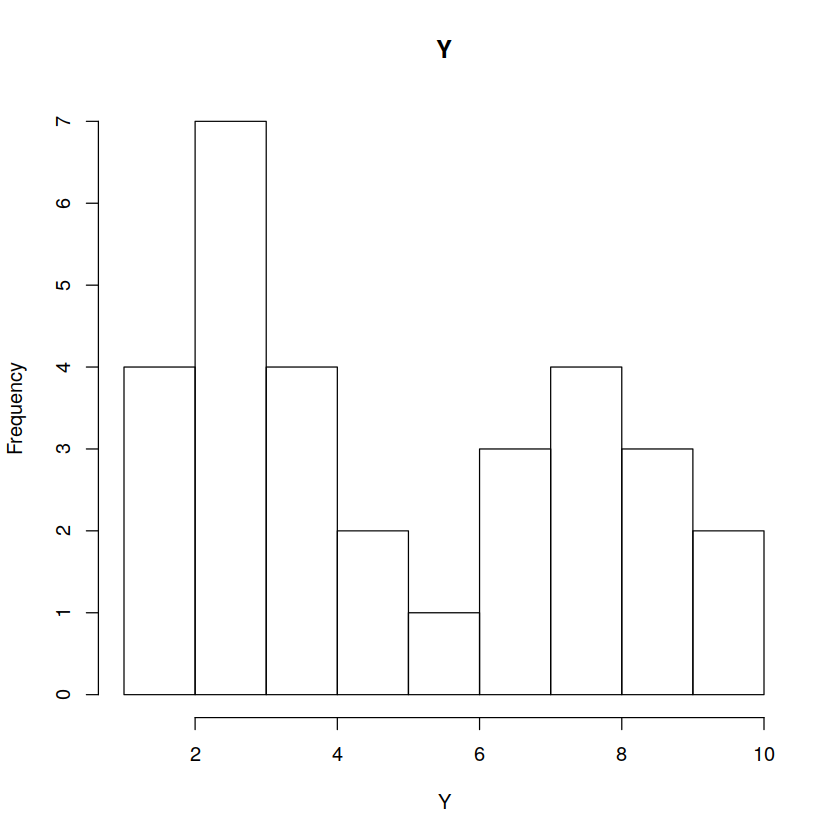

In [11]:
X=rnorm(30, 6,1)
Y=runif(30,1,10)
Z=X*Y
R=X+Y
hist(X,main="X")
hist(Y,main="Y")

DD<-data.frame(mean(X),mean(Y),mean(Z),mean(X)*mean(Y),mean(R), mean(X)+mean(Y))
colnames(DD)<-c("Сред. X", "Сред. X", "Сред. X*Y","Сред. X * Сред.Y","Сред.X+Y", "Сред. X + Сред.Y") 
View(DD)

Используя понятие математического ожидания, можно ввести дисперсию случайной величины как математическое ожидание квадрата отклонения случайной величины от ее математического ожидания:
$$D(X)=M((X-M(X))^2)=\sum_{i=1}^{n}\left(x_i-M(X)\right)^2\cdot p_i$$

Исходя из введенного определения, можно говорить про следующие свойства дисперсии:

1. $$D(X)=M((X-M(X))^2)=M(X^2)-(M(X))^2$$

Данное свойство легко следует из свойства средней:
$$M((X-M(X))^2)=M(X^2-2XM(X)+(M(X))^2)=M(X^2)-2M(X)M(X)+(M(X))^2=M(X^2)-(M(X))^2$$
На практике это означает, что дисперсию можно вычислять двумя способами:

$$D=\frac{\sum_{i=1}^{n}{\left ( x_i-\overline{x}_{\text{ариф}}\right )^2}}{n}=\frac{\sum_{i=1}^{n}x_i^2}{n}-\left(\overline{x}_{\text{ариф}}\right)^2$$
Рассмотрим пример:

In [7]:
S=c(2,5,6,7,8,5,4,3,5,6,4,3,2,4,2,4,2,3,6,7,6,5,4,4,5,6,5,4)
print(sum((S-mean(S))^2)/length(S))
print(sum(S^2)/length(S)-(mean(S))^2)
print(sd(S)^2)

[1] 2.534439
[1] 2.534439
[1] 2.628307


Обратите внимание, что рассчитанное значение не совпадает со встроенным расчетным значением. Это связано с тем, что при оценке дисперсии на выборке расчет по формуле $D=\frac{\sum_{i=1}^{n}{\left ( x_i-\overline{x}_{\text{ариф}}\right )^2}}{n}$ дает смещенную оценку в сторону занижения. Для ее коррекции используют:
$$D=\frac{\sum_{i=1}^{n}{\left ( x_i-\overline{x}_{\text{ариф}}\right )^2}}{n-1}=\frac{\sum_{i=1}^{n}x_i^2}{n-1}-\frac{n}{n-1}\cdot\left(\overline{x}_{\text{ариф}}\right)^2$$
Особенно важно пользоваться данной формулой при малом объеме выборки $n<30-40$.

In [8]:
print(sum((S-mean(S))^2)/(length(S)-1))
print(sum(S^2)/(length(S)-1)-(length(S)/(length(S)-1))*(mean(S))^2)

[1] 2.628307
[1] 2.628307


2. Дисперсия постоянной равна нулю:
$$D(C)=0, C=const$$
Действительно, 
$$D(C)=M((C-M(C))^2)=M((C-C)^2)=0$$
3. Постоянный множитель можно выносить за знак дисперсии, возводя его в квадрат:
$$D(CX)=C^2D(X)$$
Действительно,
$$D(CX)=M((CX-M(CX))^2)=M((CX-CM(X))^2)=M(C^2(X-M(X))^2)=C^2M((X-M(X))^2)=C^2D(X)$$
4. Дисперсия суммы двух независимых случайных величин равна сумме дисперсий:
$$D(X+Y)=D(X)+D(Y)$$
Действительно,
$$D(X+Y)=M((X+Y)^2)-(M(X+Y))^2=M(X^2+2XY+Y^2)-(M(X)+M(Y))^2=M(X^2)+2M(X)M(Y)+M(Y^2)-(M(X))^2-2M(X)M(Y)-(M(Y))^2=M(X^2)-(M(X))^2+M(Y^2)-(M(Y))^2=D(X)+D(Y)$$
Следствия:
$$D(C+X)=D(C)+D(X)=D(X), C=const$$
$$D(X-Y)=D(X)+D(-Y)=D(X)+(-1)^2D(Y)=D(X)+D(Y)$$

Для характеристики меры разброса изучаемого признака также используют следующие показатели:

- **коэффициент осцилляции** отражает относительный разброс крайних значений вокруг средней арифметической:
$$K_o=\frac{R}{\overline{x}_{\text{ариф}}}\cdot 100$$
- **Относительное линейное отклонение** характеризует долю усредненного значения абсолютных отклонений от средней арифметической:
$$K_d=\frac{d}{\overline{x}_{\text{ариф}}}\cdot 100$$
- **Коэффициент вариации** - относительное квадратичное отклонение:
$$K_v=\frac{\sigma}{\overline{x}_{\text{ариф}}}\cdot 100$$

По величине коэффициента вариации можно судить об однородности статистической совокупности. Чем больше величина коэффициента вариации, тем больше разброс значений признака вокруг средней арифметической, тем больше неоднородность совокупности. 

Условно принято считать, что 

при $K_v\leq30\%$ совокупность однородна;

при $30\%<K_v\leq 60\%$ - промежуточный вариант;

при $K_v>60\%$ - совокупность неоднородна.

В качестве примера рассчитаем введенные коэффициенты

In [12]:
R<-max(X)-min(X)
d<-sum(abs(X-mean(X)))
ko<-R/mean(X)*100
kd<-d/mean(X)*100
kv<-sd(X)/mean(X)*100

View(data.frame(ko,kd,kv))

ko,kd,kv
<dbl>,<dbl>,<dbl>
68.17676,381.0225,16.59788


In [10]:
R<-max(Y)-min(Y)
d<-sum(abs(Y-mean(Y)))
ko<-R/mean(Y)*100
kd<-d/mean(Y)*100
kv<-sd(Y)/mean(Y)*100

View(data.frame(ko,kd,kv))

ko,kd,kv
<dbl>,<dbl>,<dbl>
161.8876,1193.943,47.36374


При анализе также важно получить представление о форме распределения изучаемой характеристики. Основными показателями формы распределения являются **асимметрия (скос) и эксцесс**.

Для оценки степени ассиметричности распределения обычно применяют моментный коэффициент асимметрии:
$$A=\frac{\mu_3}{\sigma^3}, \mu_3=\frac{\sum_{i=1}^{n}(x_i-\overline{x}_{\text{ариф}})^3}{n}$$

Eсли $A>0$, то распределение **скошено вправо** (длинный правый хвост), если $A<0$ – то влево. При этом принята следующая условная градация: если полученное значение по модулю меньше, чем 0.25, то асимметрия незначительна, если $0.25\leq |A|<0.5$, то умеренная, и если $|A|\geq 0.5$, то существенная.

Степень существенности полученного значения также оценивается с помощью средней квадратической ошибки коэффициента ассиметрии, которая зависит от объема выборки:
$$\sigma_A=\sqrt{\frac{6(n-1)}{(n+1)(n+3)}}$$

Если отношение $\frac{|A|}{\sigma_A}>3$, то ассиметрия считается существенной, если $\frac{|A|}{\sigma_A}\leq 3$, ассиметрию можно признать несущественной, вызванной влиянием случайных причин.

Если в выборке имеются резко выделяющиеся значения, данный коэффициент пригоден мало. Нужно либо исключать выбросы, либо применять структурные показатели ассиметрии.

Простейшим признаком **правосторонней асимметрии** (длинный правый хвост) является тот факт, что $\overline{x}_{\text{ариф}}>Me$, - справа находится значительное количество значений, и поэтому средняя  смещена вправо. Поэтому Карл Пирсон  предложил следующую формулу для расчёта коэффициента асимметрии:
$$A=\frac{\overline{x}_{\text{ариф}}-Me}{\sigma}$$
где $Me$ – медиана статистической совокупности. Интерпретация значений $A$ аналогичная.

Выполним расчет коэффициентов ассиметрии для рассматриваемого примера:

In [13]:
mu3<-sum((X-mean(X))^3)/length(X)
A1<-mu3/sd(X)^3
n<-length(X)
sigmaA<-sqrt(6*(n-1)/((n+1)*(n+3)))
g<-abs(A1)/sigmaA

A2<-(mean(X)-median(X))/sd(X)

View(data.frame(A1,g,A2))

A1,g,A2
<dbl>,<dbl>,<dbl>
-0.1232329,0.2988063,-0.07912475


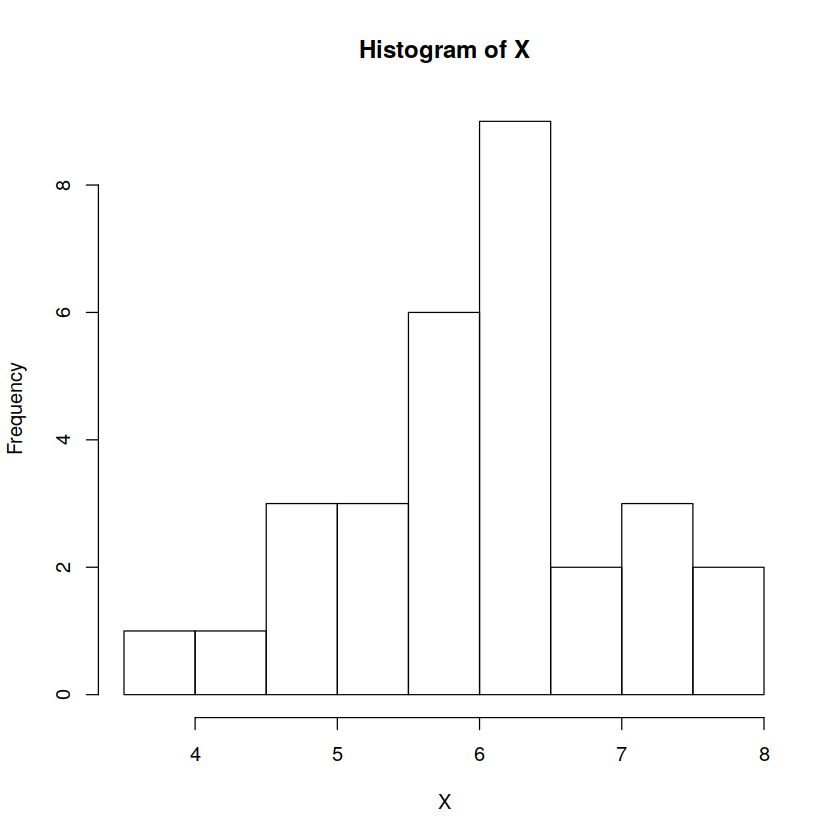

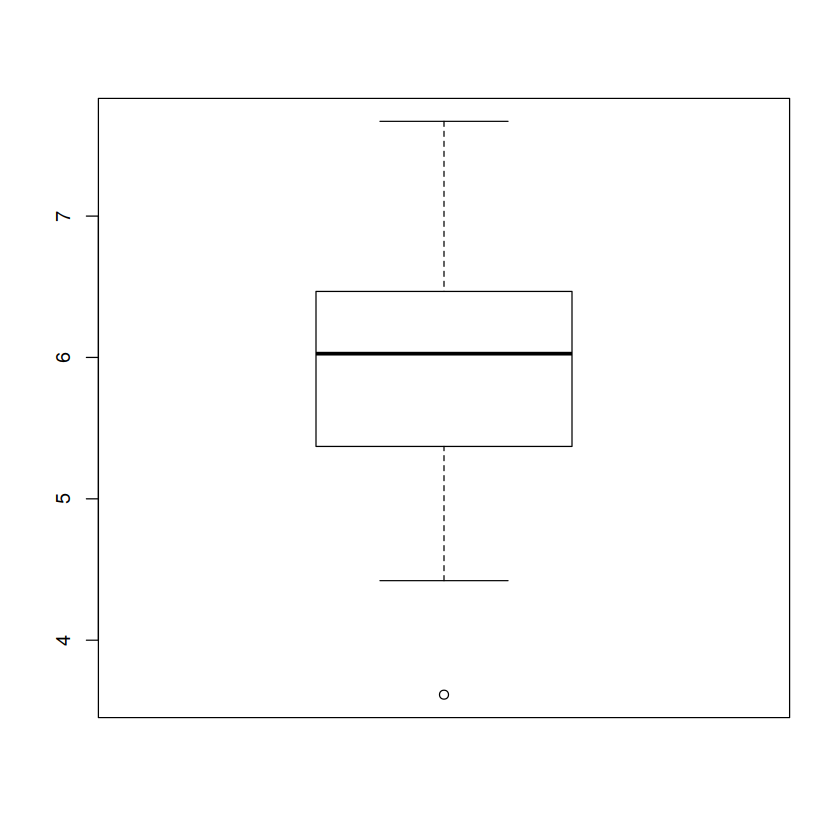

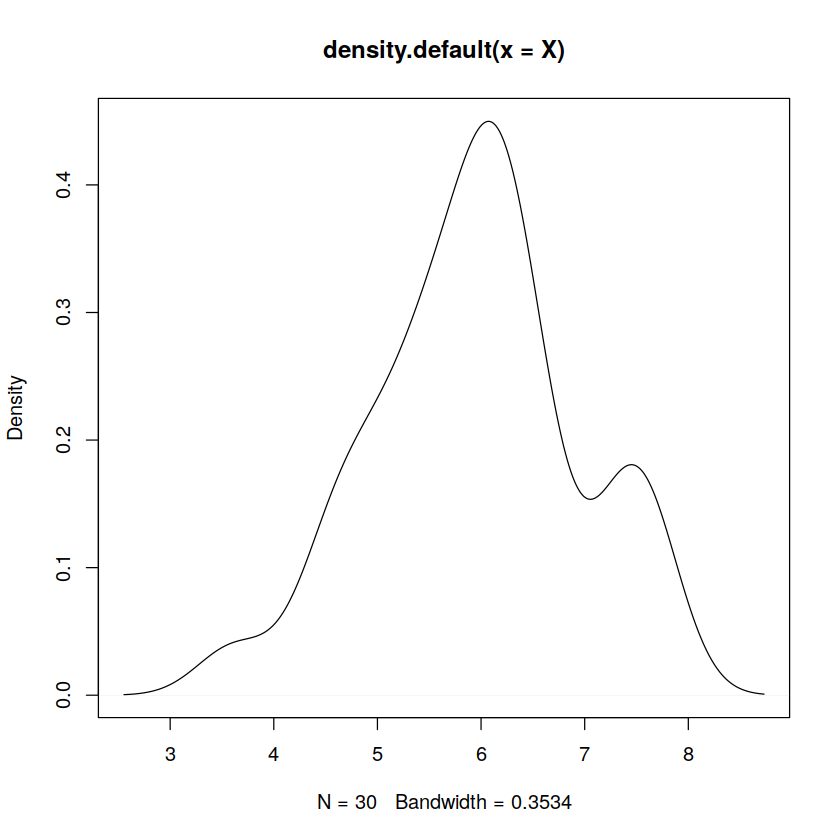

In [15]:
hist(X)
boxplot(X)
plot(density(X))

In [16]:
Z<-X[X>0]
mu3<-sum((Z-mean(Z))^3)/length(Z)
A1<-mu3/sd(Z)^3
n<-length(Z)
sigmaA<-sqrt(6*(n-1)/((n+1)*(n+3)))
g<-abs(A1)/sigmaA

A2<-(mean(Z)-median(Z))/sd(Z)

View(data.frame(A1,g,A2))

A1,g,A2
<dbl>,<dbl>,<dbl>
-0.1232329,0.2988063,-0.07912475


Другая характеристика формы распределения - это эксцесс, который характеризует степень островершинности или плосковершинности распределения относительно нормального распределения. Его определяют, используя момент четвертого порядка:

$$E=\frac{\mu_4}{\sigma^4}-3, \mu_4=\frac{\sum_{i=1}^{n}(x_i-\overline{x}_{\text{ариф}})^4}{n}$$

Если $E>0$, то распределение островершинно, если $E<0$ - плосковершинно.

Степень существенности эксцесса оценивают также относительно его ошибки:
$$\sigma_E=\sqrt{\frac{24n(n-2)(n-3)}{(n-1)^2(n+3)(n+5)}}$$
Если $\frac{|E|}{\sigma_E}>3$, то отклонение от нормального распределенния существенно, в противном случае нет.


In [17]:

mu4<-sum((X-mean(X))^3)/length(X)
E<-mu4/(sd(X))^4-3
n<-length(X)
se<-sqrt(24*n*(n-2)*(n-3)/((n-1)**2*(n+3)*(n+5)))
print(paste("Коэффициент эксцесса X равен ",toString(E)))
print(paste("Степень существенности ",toString(abs(E)/se)))

[1] "Коэффициент эксцесса X равен  -3.12481452616427"
[1] "Степень существенности  4.17432336610325"


In [18]:
mu4<-sum((Y-mean(Y))^3)/length(Y)
E<-mu4/(sd(Y))^4-3
n<-length(Y)
se<-sqrt(24*n*(n-2)*(n-3)/((n-1)**2*(n+3)*(n+5)))
print(paste("Коэффициент эксцесса X равен ",toString(E)))
print(paste("Степень существенности ",toString(abs(E)/se)))

[1] "Коэффициент эксцесса X равен  -2.94630430436913"
[1] "Степень существенности  3.93585820803115"
